In [1]:
import os 
import sys

# For Mac OS X and Linux
spark_path = "/opt/spark"
# For Windows 7+
#spark_path = "C:/opt/spark"

os.environ['SPARK_HOME'] = spark_path
os.environ['HADOOP_HOME'] = spark_path

sys.path.append(spark_path + "/bin") 
sys.path.append(spark_path + "/python") 
sys.path.append(spark_path + "/python/pyspark/") 
sys.path.append(spark_path + "/python/lib") 
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.9-src.zip")

In [2]:
from pyspark import SparkContext
from pyspark import SparkConf

In [3]:
sc = SparkContext("local[4]", "test")

In [4]:
import numpy as np

TOTAL = 1000000
dots = sc.parallelize([2.0 * np.random.random(2) - 1.0
                       for i in range(TOTAL)]) \
         .cache()
print("Number of random points:", dots.count())

stats = dots.stats()
print('Mean:', stats.mean())
print('stdev:', stats.stdev())

('Number of random points:', 1000000)
('Mean:', array([-0.00028419, -0.00086138]))
('stdev:', array([ 0.57728364,  0.57731613]))


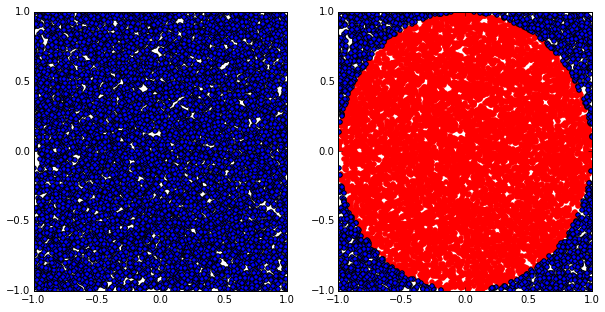

In [5]:
%matplotlib inline
from operator import itemgetter
from matplotlib import pyplot as plt

plt.figure(figsize = (10, 5))

# Plot 1
plt.subplot(1, 2, 1)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

sample = dots.sample(False, 0.01)
X = sample.map(itemgetter(0)).collect()
Y = sample.map(itemgetter(1)).collect()
plt.scatter(X, Y)

# Plot 2
plt.subplot(1, 2, 2)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

inCircle = lambda v: np.linalg.norm(v) <= 1.0
dotsIn = sample.filter(inCircle).cache()
dotsOut = sample.filter(lambda v: not inCircle(v)).cache()

# inside circle
Xin = dotsIn.map(itemgetter(0)).collect()
Yin = dotsIn.map(itemgetter(1)).collect()
plt.scatter(Xin, Yin, color = 'r')

# outside circle
Xout = dotsOut.map(itemgetter(0)).collect()
Yout = dotsOut.map(itemgetter(1)).collect()
plt.scatter(Xout, Yout)

In [6]:
pi = 4.0 * (dots.filter(inCircle).count() / float(TOTAL))
print("The estimation of \pi is:", pi)

('The estimation of \\pi is:', 3.140564)
